In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

In [2]:
final_year = datetime.date.today().year

In [3]:
fred_api_key = "ab35487ce38079a3d24b47ee3d75329f"
fred         = Fred(api_key=fred_api_key)
series_names = {
    'DGS10':  '10-year treasury bond', 
    'DGS20':  '20-year treasury bond', 
    'AAA':    '20-year AAA corporate bond', 
    'DBAA':   '20-year BAA corporate bond',
    'WSLB20': '20-year state and local bonds'
}

data_list = []
for series_key, series_name in series_names.items():
    data = fred.get_series(series_key, frequency='m')
    data.name = series_name
    data_list.append(data)
df = pd.concat(data_list, axis=1)

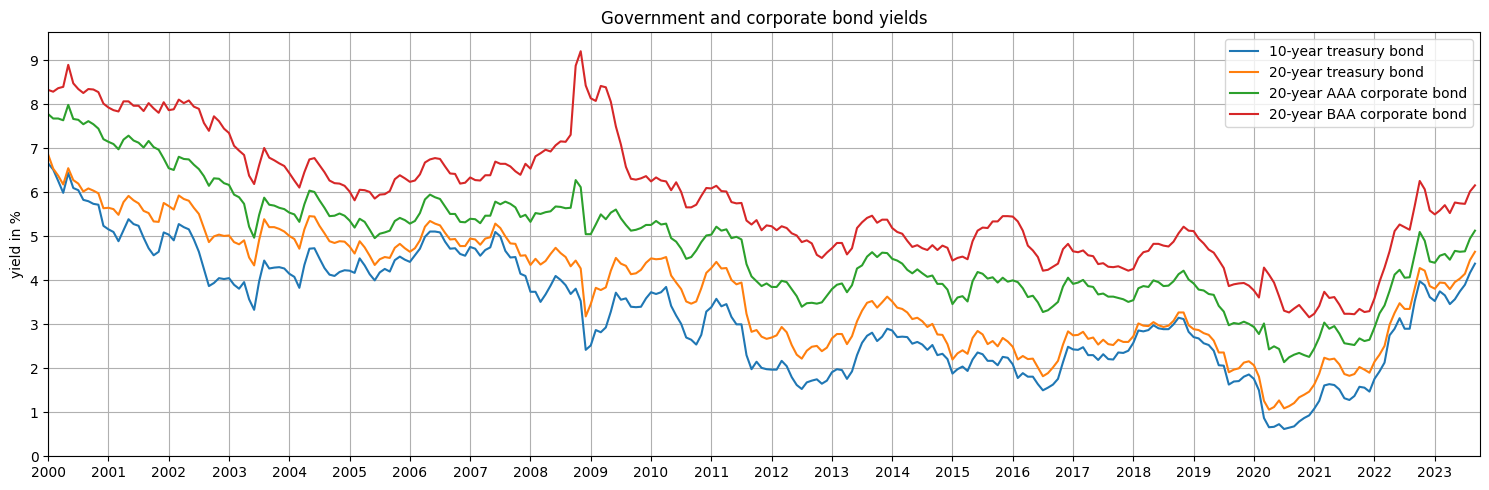

In [4]:
series_figure_1 = [series_names[key] for key in ['DGS10', 'DGS20', 'AAA', 'DBAA']]
df.loc['2000':,series_figure_1].plot(figsize=(15,5), grid=True, title="Government and corporate bond yields")
plt.xticks(ticks=[str(year) for year in range(2000,final_year+1)], labels=[str(year) for year in range(2000,final_year+1)])
plt.yticks(ticks=range(10), labels=range(10))
plt.ylabel('yield in %')
plt.tight_layout()
plt.savefig("yields_US.png", format = "png", bbox_inches='tight')
plt.savefig("yields_US.pdf", format = "pdf", bbox_inches='tight')

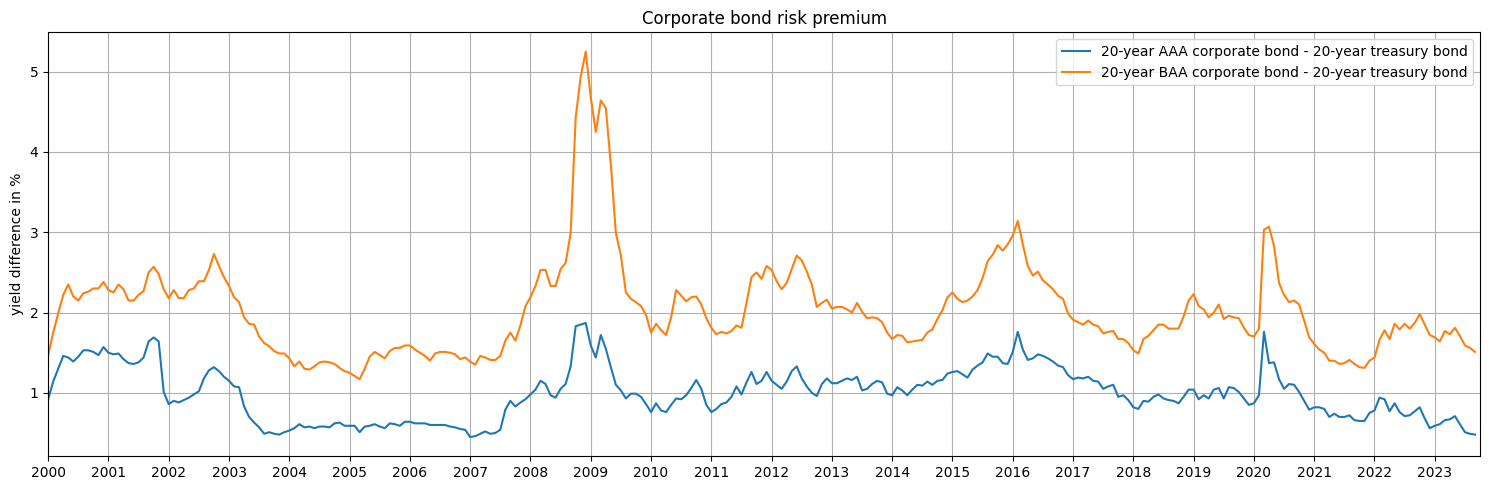

In [5]:
series_figure_2 = [series_names[key] for key in ['AAA', 'DBAA']]
df_diff = df[series_figure_2].subtract(df['20-year treasury bond'], axis=0)
df_diff.columns = ["{} - {}".format(col, '20-year treasury bond') for col in df_diff.columns]
df_diff.loc['2000':,:].plot(figsize=(15,5), grid=True, title="Corporate bond risk premium")
plt.xticks(ticks=[str(year) for year in range(2000,final_year+1)], labels=[str(year) for year in range(2000,final_year+1)])
plt.ylabel('yield difference in %')
plt.tight_layout()
plt.savefig("spreads_US.png", format = "png", bbox_inches='tight')
plt.savefig("spreads_US.pdf", format = "pdf", bbox_inches='tight')

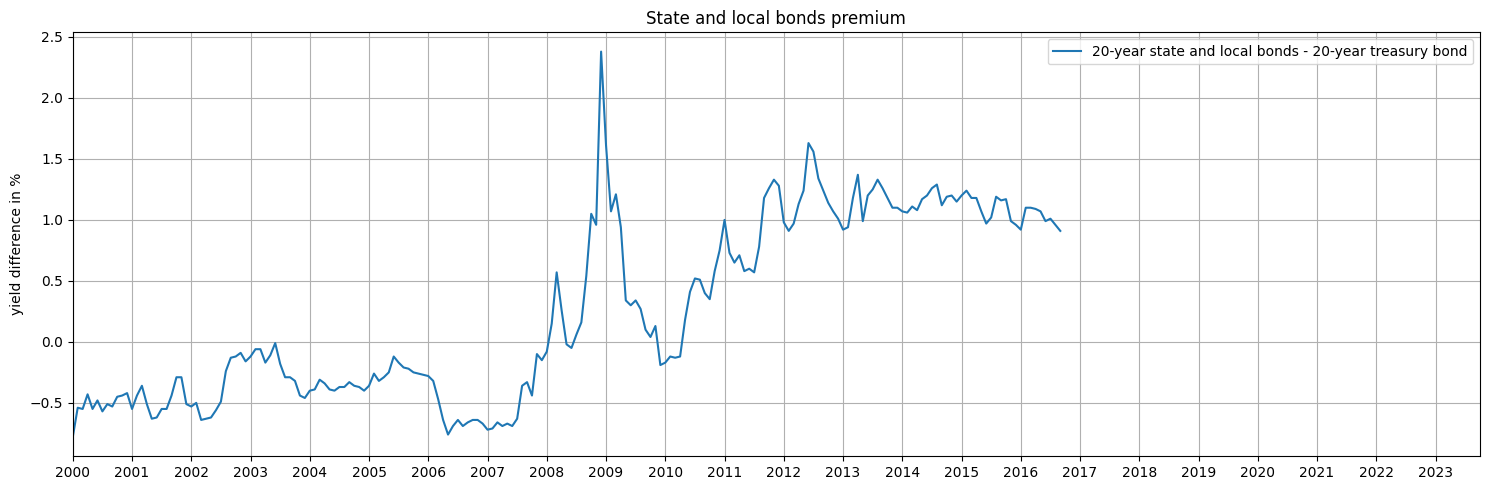

In [6]:
series_figure_3 = [series_names[key] for key in ['WSLB20']]
df_diff = df[series_figure_3].subtract(df['20-year treasury bond'], axis=0)
df_diff.columns = ["{} - {}".format(col, '20-year treasury bond') for col in df_diff.columns]
df_diff.loc['2000':,:].plot(figsize=(15,5), grid=True, title="State and local bonds premium")
plt.xticks(ticks=[str(year) for year in range(2000,final_year+1)], labels=[str(year) for year in range(2000,final_year+1)])
plt.ylabel('yield difference in %')
plt.tight_layout()
plt.savefig("spreads_US2.png", format = "png", bbox_inches='tight')
plt.savefig("spreads_US2.pdf", format = "pdf", bbox_inches='tight')